In [17]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
legend_properties = {'weight':'bold'}

In [18]:
data_folder = r"E:\data\dao-0310-23\V4_4\Incentive_1"
incentive_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
active_rate_list = [0.9, 0.8, 0.7, 0.6]
performance_across_incentive = []
consensus_across_incentive = []
diversity_across_incentive = []
variance_across_incentive = []
for incentive in incentive_list:
    performance_across_active = []
    consensus_across_active = []
    diversity_across_active = []
    variance_across_active = []
    for active in active_rate_list:
        dao_performance_file = data_folder + r"\dao_performance_incentive_{0}_inactive_{1}".format(incentive, active)
        consensus_performance_file = data_folder + r"\dao_consensus_performance_incentive_{0}_inactive_{1}".format(incentive, active)
        dao_diversity_file = data_folder + r"\dao_diversity_incentive_{0}_inactive_{1}".format(incentive, active)
        dao_variance_file = data_folder + r"\dao_variance_incentive_{0}_inactive_{1}".format(incentive, active)
        
        with open(dao_performance_file, 'rb') as infile:
            dao_performance = pickle.load(infile)
        with open(dao_diversity_file, 'rb') as infile:
            dao_diversity = pickle.load(infile)
        with open(dao_variance_file, 'rb') as infile:
            dao_variance = pickle.load(infile)
        with open(consensus_performance_file, 'rb') as infile:
            consensus_performance = pickle.load(infile)

        performance_across_active.append(dao_performance)
        consensus_across_active.append(consensus_performance)
        diversity_across_active.append(dao_diversity)
        variance_across_active.append(dao_variance)

    performance_across_incentive.append(performance_across_active)
    consensus_across_incentive.append(consensus_across_active)
    diversity_across_incentive.append(diversity_across_active)
    variance_across_incentive.append(variance_across_active)

In [5]:
# 2 by 2 experiment
reference_line = ""

incentive_22 = [0.1, 0.9]
active_22 = [0.9, 0.6]
performance_across_incentive_22 = []
consensus_across_incentive_22 = []
diversity_across_incentive_22 = []
variance_across_incentive_22 = []
for incentive in incentive_22:
    performance_across_active = []
    consensus_across_active = []
    diversity_across_active = []
    variance_across_active = []
    for inactive in active_22:
        dao_performance_file = data_folder + r"\dao_performance_incentive_{0}_inactive_{1}".format(incentive, inactive)
        consensus_performance_file = data_folder + r"\dao_consensus_performance_incentive_{0}_inactive_{1}".format(incentive, inactive)
        dao_diversity_file = data_folder + r"\dao_diversity_incentive_{0}_inactive_{1}".format(incentive, inactive)
        dao_variance_file = data_folder + r"\dao_variance_incentive_{0}_inactive_{1}".format(incentive, inactive)
        
        with open(dao_performance_file, 'rb') as infile:
            dao_performance = pickle.load(infile)
        with open(dao_diversity_file, 'rb') as infile:
            dao_diversity = pickle.load(infile)
        with open(dao_variance_file, 'rb') as infile:
            dao_variance = pickle.load(infile)
        with open(consensus_performance_file, 'rb') as infile:
            consensus_performance = pickle.load(infile)

        performance_across_active.append(dao_performance[:301])
        consensus_across_active.append(consensus_performance[:301])
        diversity_across_active.append(dao_diversity[:301])
        variance_across_active.append(dao_variance[:301])

    performance_across_incentive_22.append(performance_across_active)
    consensus_across_incentive_22.append(consensus_across_active)
    diversity_across_incentive_22.append(diversity_across_active)
    variance_across_incentive_22.append(variance_across_active)

In [6]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

In [7]:
# print(np.array(performance_across_incentive).shape)
# print(np.array(performance_across_inactive).shape)
# print(np.array(performance_across_incentive[0]).shape)
# print(np.array(performance_across_incentive_22).shape)
print("incentive: 0.1, active: 0.9", performance_across_incentive_22[0][0][-1])
print("incentive: 0.1, active: 0.6", performance_across_incentive_22[0][1][-1])
print("incentive: 0.9, active: 0.9", performance_across_incentive_22[1][0][-1])
print("incentive: 0.9, active: 0.6", performance_across_incentive_22[1][1][-1])

incentive: 0.1, active: 0.9 0.7626539682539683
incentive: 0.1, active: 0.6 0.5558596825396827
incentive: 0.9, active: 0.9 0.7120215873015873
incentive: 0.9, active: 0.6 0.7309923809523808


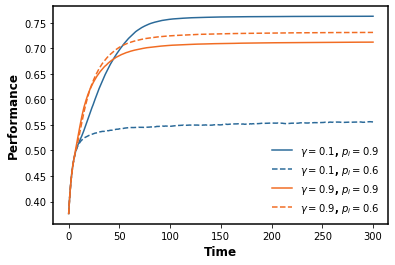

<Figure size 432x288 with 0 Axes>

In [9]:
# Performance 2 * 2
colors = [nature_blue, nature_green, nature_orange, morandi_red]  # 10 colors
x = range(len(performance_across_incentive_22[0][0]))

fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
# print(index, incentive)
for i, incentive in enumerate(incentive_22):
    for j, active in enumerate(active_22):
        if (incentive == 0.1) & (active == 0.9): # low incentive (blue line); high active (solid line)
            plt.plot(x, performance_across_incentive_22[i][j], "-", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_blue)
        elif (incentive == 0.9) & (active == 0.9): # low incentive (orange line); high active (solid line)
            plt.plot(x, performance_across_incentive_22[i][j], "-", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_orange)
        elif (incentive == 0.1) & (active == 0.6): # low incentive (blue line); low active (dashed line)
            plt.plot(x, performance_across_incentive_22[i][j], "--", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_blue)
        elif (incentive == 0.9) & (active == 0.6): # low incentive (orange line); low active (dashed line)
            plt.plot(x, performance_across_incentive_22[i][j], "--", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_orange)
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\performance_across_22.png", transparent=True, dpi=300)
plt.show()
plt.clf()

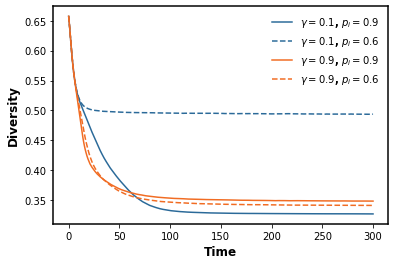

<Figure size 432x288 with 0 Axes>

In [11]:
# Diversity 2 * 2
# incentive_list = [0, 1, 10, 100]
# inactive_rate_list = [0, 0.1, 0.2, 0.3, 0.4]
colors = [nature_blue, nature_green, nature_orange, morandi_red]  # 10 colors
x = range(len(performance_across_incentive_22[0][0]))

fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
# print(index, incentive)
for i, incentive in enumerate(incentive_22):
    for j, active in enumerate(active_22):
        if (incentive == 0.1) & (active == 0.9): # low incentive (blue line); low inactive (solid line)
            plt.plot(x, diversity_across_incentive_22[i][j], "-", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_blue)
        elif (incentive == 0.9) & (active == 0.9): # low incentive (orange line); low inactive (solid line)
            plt.plot(x, diversity_across_incentive_22[i][j], "-", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_orange)
        elif (incentive == 0.1) & (active == 0.6): # low incentive (blue line); low inactive (solid line)
            plt.plot(x, diversity_across_incentive_22[i][j], "--", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_blue)
        elif (incentive == 0.9) & (active == 0.6): # low incentive (orange line); low inactive (solid line)
            plt.plot(x, diversity_across_incentive_22[i][j], "--", label='$\\gamma={0}$, $p_i={1}$'.format(incentive, active), color=nature_orange)
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Diversity', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\diversity_across_22.png", transparent=True, dpi=300)
plt.show()
plt.clf()

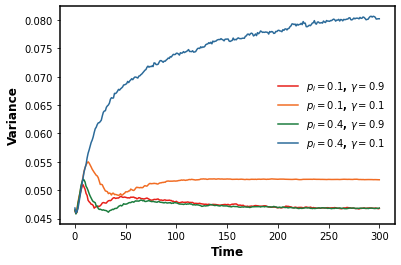

<Figure size 432x288 with 0 Axes>

In [13]:
# Variance 2 * 2
deep_green = "#11722E"
shallow_green = "#91CE8A"
deep_orange = "#FF8C00"
shallow_orange = "#FFA500"
colors = [nature_blue, nature_green, nature_orange, morandi_red]
incentive_22 = [0.1, 0.9]
inactive_22 = [0.1, 0.4]
x = range(301)

fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, variance_across_incentive_22[1][0], "-", label='$p_i=0.1$, $\\gamma=0.9$', color=morandi_red)  # High High  (engagement, incentive)
plt.plot(x, variance_across_incentive_22[0][0], "-", label='$p_i=0.1$, $\\gamma=0.1$', color=nature_orange) # High Low
plt.plot(x, variance_across_incentive_22[1][1], "-", label='$p_i=0.4$, $\\gamma=0.9$', color=nature_green) # Low High
plt.plot(x, variance_across_incentive_22[0][1], "-", label='$p_i=0.4$, $\\gamma=0.1$', color=nature_blue) # Low Low
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\Incentive_variance.png", transparent=True, dpi=300)
plt.show()
plt.clf()

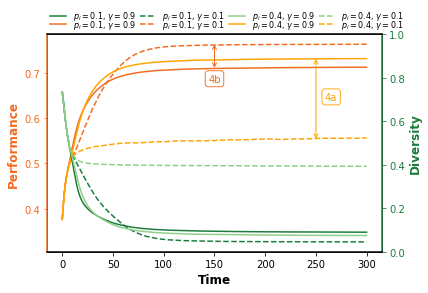

<Figure size 432x288 with 0 Axes>

In [15]:
# Twin
import numpy as np
deep_green = "#11722E"
shallow_green = "#91CE8A"
deep_orange = "#FF8C00"
shallow_orange = "#FFA500"
# shallow_orange = "#EBA075"

x = range(301)
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("Time", fontweight='bold', fontsize = 12)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black", fontsize=12)

ax2.spines['left'].set_color(nature_orange) # left y-axis
ax1.yaxis.label.set_color(nature_orange) # left y-axis labels
ax1.tick_params(axis='y', colors=nature_orange) # left y-axis params
ax2.spines['right'].set_color(nature_green) # right y-axis
ax2.yaxis.label.set_color(nature_green)  # right y-axis labels
ax2.tick_params(axis='y', colors=nature_green) # right y-axis params

ax2.spines["left"].set_linewidth(1.5)
ax2.spines["right"].set_linewidth(1.5)
ax2.spines["top"].set_linewidth(1.5)
ax2.spines["bottom"].set_linewidth(1.5)

line_1 = ax1.plot(x, performance_across_incentive_22[1][0], "-", color=nature_orange, label="$p_i=0.1$, $\\gamma=0.9$")
line_2 = ax1.plot(x, performance_across_incentive_22[0][0], "--", color=nature_orange, label="$p_i=0.1$, $\\gamma=0.1$")
line_3 = ax1.plot(x, performance_across_incentive_22[1][1], "-", color=shallow_orange, label="$p_i=0.4$, $\\gamma=0.9$")
line_4 = ax1.plot(x, performance_across_incentive_22[0][1], "--", color=shallow_orange, label="$p_i=0.4$, $\\gamma=0.1$")

line_5 = ax1.plot(x, diversity_across_incentive_22[1][0], "-", color=nature_green, label="$p_i=0.1$, $\\gamma=0.9$")
line_6 = ax1.plot(x, diversity_across_incentive_22[0][0], "--", color=nature_green, label="$p_i=0.1$, $\\gamma=0.1$")
line_7 = ax1.plot(x, diversity_across_incentive_22[1][1], "-", color=shallow_green, label="$p_i=0.4$, $\\gamma=0.9$")
line_8 = ax1.plot(x, diversity_across_incentive_22[0][1], "--", color=shallow_green, label="$p_i=0.4$, $\\gamma=0.1$")

lines_1 = line_1 + line_2 + line_3 + line_4
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, fontsize=8, loc=(0, 1),  ncol=4, columnspacing=0.5) # labelspacing=1 for vertical distance

lines_2 = line_5 + line_6 + line_7 + line_8
labs_2 = [l.get_label() for l in lines_1]

ax2.legend(lines_2, labs_2, frameon=False, fontsize=8, loc=(0, 1.04),  ncol=4, columnspacing=0.5)

# Find the convergence point - x
converge_point =  150
# Set the upper and lower positions of the arrow - y
arrow_upper_pos = performance_across_incentive_22[0][0][-1] + 0.004
arrow_lower_pos = performance_across_incentive_22[1][0][-1] - 0.006

# Add the double-sided arrow
ax1.annotate('', xy=(converge_point, arrow_upper_pos), xytext=(converge_point, arrow_lower_pos),
             textcoords='data',
            arrowprops=dict(arrowstyle='<->', color=nature_orange),  horizontalalignment='right', verticalalignment='center')
# Add text
bbox_props = dict(boxstyle="round", fc="none", ec=nature_orange, lw=1, alpha=0.9)
lasso = ax1.annotate("4b", xy=(150, 0.68), xytext=(150, 0.68), bbox=bbox_props, ha="center", color=nature_orange)

# Find the convergence point - x
converge_point = 250
# Set the upper and lower positions of the arrow - y
arrow_upper_pos = performance_across_incentive_22[1][1][-1] + 0.004
arrow_lower_pos = performance_across_incentive_22[0][1][-1] - 0.006
# Add the double-sided arrow
ax1.annotate('', xy=(converge_point, arrow_upper_pos), xytext=(converge_point, arrow_lower_pos),
             textcoords='data',
            arrowprops=dict(arrowstyle='<->', color=shallow_orange),  horizontalalignment='right', verticalalignment='center')
# Add text
bbox_props = dict(boxstyle="round", fc="none", ec=shallow_orange, lw=1, alpha=0.9)
lasso = ax1.annotate("4a", xy=(265, 0.64), xytext=(265, 0.64), bbox=bbox_props, ha="center", color=shallow_orange)

plt.savefig(data_folder + r"\Incentive_performance_diversity.png", transparent=True, dpi=1000, bbox_inches='tight')
plt.show()
plt.clf()


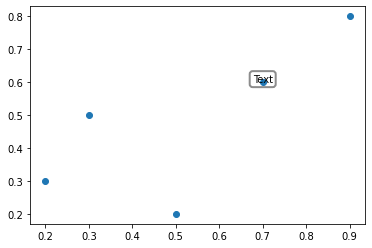

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Draw a scatter plot of random data points
x = [0.2, 0.3, 0.5, 0.7, 0.9]
y = [0.3, 0.5, 0.2, 0.6, 0.8]
ax.scatter(x, y)

# Annotate a point using a lasso with transparent background and gray border
point_idx = 3 # Index of the point to annotate
point = (x[point_idx], y[point_idx])
bbox_props = dict(boxstyle="round", fc="none", ec="gray", lw=2, alpha=0.9)
lasso = ax.annotate("Text", xy=point, xytext=point, bbox=bbox_props, ha="center")

plt.show()


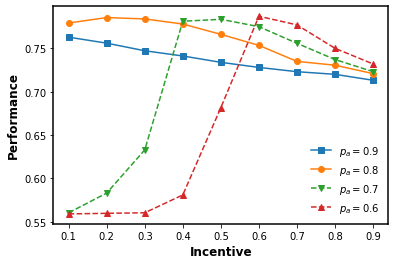

<Figure size 432x288 with 0 Axes>

In [33]:
# Fixing active rate, varying incentive
# high active rate: 0.9
performance_across_incentive_active_9 = []
for incentive in incentive_list:
    dao_performance_file = data_folder + r"\dao_performance_incentive_{0}_inactive_{1}".format(incentive, 0.9)
    consensus_performance_file = data_folder + r"\dao_consensus_performance_incentive_{0}_inactive_{1}".format(incentive, 0.9)
    dao_diversity_file = data_folder + r"\dao_diversity_incentive_{0}_inactive_{1}".format(incentive, 0.9)
    dao_variance_file = data_folder + r"\dao_variance_incentive_{0}_inactive_{1}".format(incentive, 0.9)
        
    with open(dao_performance_file, 'rb') as infile:
        dao_performance = pickle.load(infile)
    with open(dao_diversity_file, 'rb') as infile:
        dao_diversity = pickle.load(infile)

    performance_across_incentive_active_9.append(dao_performance[-1])

performance_across_incentive_active_6 = []
for incentive in incentive_list:
    dao_performance_file = data_folder + r"\dao_performance_incentive_{0}_inactive_{1}".format(incentive, 0.6)
    consensus_performance_file = data_folder + r"\dao_consensus_performance_incentive_{0}_inactive_{1}".format(incentive, 0.6)
    dao_diversity_file = data_folder + r"\dao_diversity_incentive_{0}_inactive_{1}".format(incentive, 0.6)
    dao_variance_file = data_folder + r"\dao_variance_incentive_{0}_inactive_{1}".format(incentive, 0.6)
        
    with open(dao_performance_file, 'rb') as infile:
        dao_performance = pickle.load(infile)
    with open(dao_diversity_file, 'rb') as infile:
        dao_diversity = pickle.load(infile)

    performance_across_incentive_active_6.append(dao_performance[-1])

performance_across_incentive_active_7 = []
for incentive in incentive_list:
    dao_performance_file = data_folder + r"\dao_performance_incentive_{0}_inactive_{1}".format(incentive, 0.7)
    consensus_performance_file = data_folder + r"\dao_consensus_performance_incentive_{0}_inactive_{1}".format(incentive, 0.7)
    dao_diversity_file = data_folder + r"\dao_diversity_incentive_{0}_inactive_{1}".format(incentive, 0.7)
    dao_variance_file = data_folder + r"\dao_variance_incentive_{0}_inactive_{1}".format(incentive, 0.7)
        
    with open(dao_performance_file, 'rb') as infile:
        dao_performance = pickle.load(infile)
    with open(dao_diversity_file, 'rb') as infile:
        dao_diversity = pickle.load(infile)

    performance_across_incentive_active_7.append(dao_performance[-1])

performance_across_incentive_active_8 = []
for incentive in incentive_list:
    dao_performance_file = data_folder + r"\dao_performance_incentive_{0}_inactive_{1}".format(incentive, 0.8)
    consensus_performance_file = data_folder + r"\dao_consensus_performance_incentive_{0}_inactive_{1}".format(incentive, 0.8)
    dao_diversity_file = data_folder + r"\dao_diversity_incentive_{0}_inactive_{1}".format(incentive, 0.8)
    dao_variance_file = data_folder + r"\dao_variance_incentive_{0}_inactive_{1}".format(incentive, 0.8)
        
    with open(dao_performance_file, 'rb') as infile:
        dao_performance = pickle.load(infile)
    with open(dao_diversity_file, 'rb') as infile:
        dao_diversity = pickle.load(infile)

    performance_across_incentive_active_8.append(dao_performance[-1])

# Diversity
x = range(len(dao_performance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)

plt.plot(incentive_list, performance_across_incentive_active_9, "-s", label="$p_a=0.9$")
plt.plot(incentive_list, performance_across_incentive_active_8, "-o", label="$p_a=0.8$")
plt.plot(incentive_list, performance_across_incentive_active_7, "--v", label="$p_a=0.7$")
plt.plot(incentive_list, performance_across_incentive_active_6, "--^", label="$p_a=0.6$")
plt.xlabel('Incentive', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(incentive_list)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\Performance_across_incentive.png", transparent=True, dpi=300)
plt.show()
plt.clf()